<a href="https://colab.research.google.com/github/govardhan-rbg/Banking_system/blob/main/data-science-mini-Projects/Food_Vision_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# since tensorflow version > 2.5 mixed precision provides an error  

!pip install tensorflow==2.4.1

     |████████████████████████████████| 394.3 MB 13 kB/s 
     |████████████████████████████████| 2.9 MB 38.6 MB/s 
     |████████████████████████████████| 462 kB 64.9 MB/s 
     |████████████████████████████████| 3.8 MB 31.4 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.34.1
    Uninstalling grpcio-1.34.1:
      Successfully uninstalled grpcio-1.34.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.5.0
    Uninstalling tensorflow-2.5.

In [ ]:
!nvidia-smi

Sun Aug  1 08:09:22 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-86f3de8e-8cb7-a2ed-2bd4-b17e95a0b7b1)


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-08-01 08:09:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-08-01 08:09:24 (108 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback , compare_historys , load_and_prep_image , plot_loss_curves 

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
datasets_list = tfds.list_builders()
'food101' in datasets_list

True

In [ ]:
(train_data , test_data) , ds_info = tfds.load('food101' , 
                                               split = ['train' , 'validation'] , 
                                               as_supervised = 'True' , 
                                               shuffle_files = True , 
                                               with_info = True)

In [ ]:
ds_info

tfds.core.DatasetInfo(
    name='food101',
    version=2.0.0,
    description='This dataset consists of 101 food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.',
    homepage='https://www.vision.ee.ethz.ch/datasets_extra/food-101/',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
    }),
    total_num_examples=101000,
    splits={
        'train': 75750,
        'validation': 25250,
    },
    supervised_keys=('image', 'label'),
    citation="""@inproceedings{bossard14,
      title = {Food-101 -- Mining Discriminative Components with Random Forests},
      

In [ ]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [ ]:
ds_info.features['image']

Image(shape=(None, None, 3), dtype=tf.uint8)

In [ ]:
classes = ds_info.features['label'].names
classes

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [ ]:
sample_train_data = train_data.take(1)
sample_train_data

<TakeDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [ ]:
len(sample_train_data)

1

In [ ]:
for image , label in sample_train_data :
  print(f"""
  Image shape : {image.shape} , 
  Image dtype : {image.dtype} ,
  Image label : {label} ,
  Image class : {classes[label.numpy()]}
  """)  


  Image shape : (384, 512, 3) , 
  Image dtype : <dtype: 'uint8'> ,
  Image label : 97 ,
  Image class : takoyaki
  


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as imge
def get_image_details(image = image , label = label ):
  plt.imshow(image)
  plt.title(f"""
  Image shape : {image.shape} , 
  Image dtype : {image.dtype} ,
  Image label : {label} ,
  Image class : {classes[label.numpy()]}
  """)
  plt.axis(False)

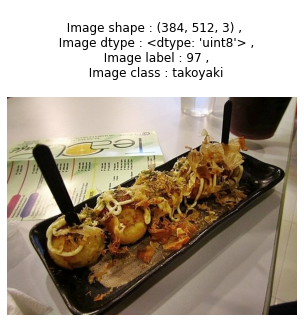

In [ ]:
get_image_details()

In [ ]:
def preprocess_image(image , label , image_shape_x = 224 , image_shape_y = 224 ):
  image = tf.image.resize(image , [image_shape_x , image_shape_y])
  return tf.cast(image , tf.float32) , label

In [ ]:
 preprocessed_image , label = preprocess_image(image , label)

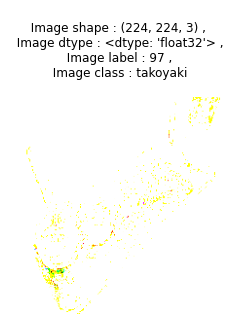

In [ ]:
get_image_details(image = preprocessed_image)

In [ ]:
# preprocessing all train data images
train_data = train_data.map(preprocess_image , num_parallel_calls= tf.data.AUTOTUNE)

# shuffling and making batches of train data
train_data = train_data.shuffle(buffer_size = 1000).batch(batch_size = 32).prefetch(buffer_size = tf.data.AUTOTUNE)

# preprocessing all test data images
test_data = test_data.map(preprocess_image , num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size = 32).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
len(train_data) , len(test_data)

(2368, 790)

In [ ]:
def create_model_checkPoint_callback(checkpoint_path ):
  model_checkPoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path , 
                                                                 monitor = 'val_acc' , 
                                                                 verbose = 1 ,  
                                                                 save_weights_only = True , 
                                                                 save_best_only = True)
  
  return model_checkPoint_callback

In [ ]:
checkpoint_path = '/content/model_checkpoint_callback_files/checkpoint.ckpt'

In [ ]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


In [ ]:
mixed_precision.global_policy()

<Policy "mixed_float16">

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape= (224 , 224 , 3) , name = 'Input_Layer')

x = base_model(inputs)

x = tf.keras.layers.GlobalAveragePooling2D(name = 'Global_Average_Pooling2D')(x)

output = tf.keras.layers.Dense(len(classes) , activation = 'softmax' , dtype = tf.float32 , name = 'output_Layer')(x)

model = tf.keras.Model(inputs , output)

model.compile(loss = 'sparse_categorical_crossentropy' , 
              optimizer = 'adam' , 
              metrics = ['accuracy'])


16711680/16705208 [==============================] - 0s 0us/step


In [ ]:
for layer in model.layers:
  print(f"""
  layer_name : {layer.name} , 
  layer_trainable : {layer.trainable} , 
  layer_dtype : {layer.dtype} , 
  layer_dtype_policy : {layer.dtype_policy}
  -------------------------->*****<----------------
  """)


  layer_name : Input_Layer , 
  layer_trainable : True , 
  layer_dtype : float32 , 
  layer_dtype_policy : <Policy "float32">
  -------------------------->*****<----------------
  

  layer_name : efficientnetb0 , 
  layer_trainable : False , 
  layer_dtype : float32 , 
  layer_dtype_policy : <Policy "mixed_float16">
  -------------------------->*****<----------------
  

  layer_name : Global_Average_Pooling2D , 
  layer_trainable : True , 
  layer_dtype : float32 , 
  layer_dtype_policy : <Policy "mixed_float16">
  -------------------------->*****<----------------
  

  layer_name : output_Layer , 
  layer_trainable : True , 
  layer_dtype : float32 , 
  layer_dtype_policy : <Policy "float32">
  -------------------------->*****<----------------
  


In [ ]:
history_1 = model.fit(train_data , 
                      epochs = 3 , 
                      steps_per_epoch = len(train_data) , 
                      validation_data = test_data , 
                      validation_steps = int(0.15*len(test_data)) ,
                      callbacks = [create_tensorboard_callback('tensorflow_hub' , 'Model_1_without_using_DA_and_Fine_Tuning') , 
                                   create_model_checkPoint_callback(checkpoint_path)])

                                   

Saving TensorBoard log files to: tensorflow_hub/Model_1_without_using_DA_and_Fine_Tuning/20210801-082221
Epoch 1/3
2368/2368 [==============================] - 235s 83ms/step - loss: 2.3788 - accuracy: 0.4529 - val_loss: 1.2421 - val_accuracy: 0.6687


Epoch 2/3
2368/2368 [==============================] - 172s 72ms/step - loss: 1.3842 - accuracy: 0.6422 - val_loss: 1.1249 - val_accuracy: 0.6989


Epoch 3/3
2368/2368 [==============================] - 177s 74ms/step - loss: 1.2246 - accuracy: 0.6815 - val_loss: 1.1015 - val_accuracy: 0.6984


In [ ]:
model_1_without_using_DA_and_Fine_Tuning_results = model.evaluate(test_data)
model_1_without_using_DA_and_Fine_Tuning_results

790/790 [==============================] - 56s 71ms/step - loss: 1.0938 - accuracy: 0.7046


[1.0938106775283813, 0.7045544385910034]

# **Model using Data Augumentation**

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing

data_augumentation = tf.keras.Sequential([
                                          preprocessing.RandomFlip('horizontal') , 
                                          preprocessing.RandomHeight(0.2) , 
                                          preprocessing.RandomRotation(0.2) , 
                                          preprocessing.RandomWidth(0.2) , 
                                          preprocessing.RandomZoom(0.2) 
] , name = 'Data_Augumentation_layer')

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape= (224 , 224 , 3) , name = 'Input_Layer')

x = data_augumentation(inputs )

x = base_model(x , training = False)

x = tf.keras.layers.GlobalAveragePooling2D(name = 'Global_Average_Pooling2D')(x)

output = tf.keras.layers.Dense(len(classes) , activation = 'softmax' , dtype = tf.float32 , name = 'output_Layer')(x)

model_2 = tf.keras.Model(inputs , output)

model_2.compile(loss = 'sparse_categorical_crossentropy' , 
              optimizer = 'adam' , 
              metrics = ['accuracy'])


In [ ]:
history_2 = model_2.fit(train_data , 
                      epochs = 3 , 
                      steps_per_epoch = len(train_data) , 
                      validation_data = test_data , 
                      validation_steps = int(0.15*len(test_data)) ,
                      callbacks = [create_tensorboard_callback('tensorflow_hub' , 'Model_2_using_DA') , 
                                   create_model_checkPoint_callback('/content/sample_data/Model_2_using_DA_model_checkpoint_callback_files/checkpoint.ckpt')])

Saving TensorBoard log files to: tensorflow_hub/Model_2_using_DA/20210801-083637
Epoch 1/3
2368/2368 [==============================] - 201s 81ms/step - loss: 2.7207 - accuracy: 0.3740 - val_loss: 1.4252 - val_accuracy: 0.6242

Epoch 00001: saving model to /content/sample_data/Model_2_using_DA_model_checkpoint_callback_files/checkpoint.ckpt
Epoch 2/3
2368/2368 [==============================] - 180s 75ms/step - loss: 1.7849 - accuracy: 0.5488 - val_loss: 1.3044 - val_accuracy: 0.6515

Epoch 00002: saving model to /content/sample_data/Model_2_using_DA_model_checkpoint_callback_files/checkpoint.ckpt
Epoch 3/3
2368/2368 [==============================] - 176s 74ms/step - loss: 1.6452 - accuracy: 0.5805 - val_loss: 1.2668 - val_accuracy: 0.6666

Epoch 00003: saving model to /content/sample_data/Model_2_using_DA_model_checkpoint_callback_files/checkpoint.ckpt


In [ ]:
model_2_using_DA_results = model_2.evaluate(test_data)
model_2_using_DA_results

790/790 [==============================] - 49s 62ms/step - loss: 1.2785 - accuracy: 0.6560


[1.2784755229949951, 0.6560395956039429]

In [ ]:
model_2.layers

In [ ]:
for layer in model_2.layers :
  print(f'{layer} -------> {layer.trainable} ')

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7effe6f03bd0> -------> True 
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7efffbc65950> -------> True 
<tensorflow.python.keras.engine.functional.Functional object at 0x7effe8569d90> -------> False 
<tensorflow.python.keras.layers.pooling.GlobalAveragePooling2D object at 0x7effe8345d10> -------> True 
<tensorflow.python.keras.layers.core.Dense object at 0x7effe8039dd0> -------> True 


In [ ]:
base_model.layers

In [ ]:
for i , layer in enumerate(base_model.layers):
  print(f'{i} {layer.name} -----------> {layer.trainable} ')

0 input_2 -----------> False 
1 rescaling_1 -----------> False 
2 normalization_1 -----------> False 
3 stem_conv_pad -----------> False 
4 stem_conv -----------> False 
5 stem_bn -----------> False 
6 stem_activation -----------> False 
7 block1a_dwconv -----------> False 
8 block1a_bn -----------> False 
9 block1a_activation -----------> False 
10 block1a_se_squeeze -----------> False 
11 block1a_se_reshape -----------> False 
12 block1a_se_reduce -----------> False 
13 block1a_se_expand -----------> False 
14 block1a_se_excite -----------> False 
15 block1a_project_conv -----------> False 
16 block1a_project_bn -----------> False 
17 block2a_expand_conv -----------> False 
18 block2a_expand_bn -----------> False 
19 block2a_expand_activation -----------> False 
20 block2a_dwconv_pad -----------> False 
21 block2a_dwconv -----------> False 
22 block2a_bn -----------> False 
23 block2a_activation -----------> False 
24 block2a_se_squeeze -----------> False 
25 block2a_se_reshape -----

In [ ]:
base_model.trainable = True
for layer in base_model.layers[:-10] :
  layer.trainable = False

In [ ]:
for i , layer in enumerate(base_model.layers) :
  print(f'{i} {layer.name} ---------> {layer.trainable} ')

0 input_2 ---------> False 
1 rescaling_1 ---------> False 
2 normalization_1 ---------> False 
3 stem_conv_pad ---------> False 
4 stem_conv ---------> False 
5 stem_bn ---------> False 
6 stem_activation ---------> False 
7 block1a_dwconv ---------> False 
8 block1a_bn ---------> False 
9 block1a_activation ---------> False 
10 block1a_se_squeeze ---------> False 
11 block1a_se_reshape ---------> False 
12 block1a_se_reduce ---------> False 
13 block1a_se_expand ---------> False 
14 block1a_se_excite ---------> False 
15 block1a_project_conv ---------> False 
16 block1a_project_bn ---------> False 
17 block2a_expand_conv ---------> False 
18 block2a_expand_bn ---------> False 
19 block2a_expand_activation ---------> False 
20 block2a_dwconv_pad ---------> False 
21 block2a_dwconv ---------> False 
22 block2a_bn ---------> False 
23 block2a_activation ---------> False 
24 block2a_se_squeeze ---------> False 
25 block2a_se_reshape ---------> False 
26 block2a_se_reduce ---------> False

In [ ]:
model_2.compile(loss = 'sparse_categorical_crossentropy' , 
                optimizer = tf.keras.optimizers.Adam(lr = 0.0001) , 
                metrics = ['accuracy'])
history_2_fine_tuned = model_2.fit(train_data , 
                   epochs = 6 , 
                   steps_per_epoch = len(train_data) ,
                   validation_data = test_data , 
                   validation_steps = len(test_data) , 
                   initial_epoch = history_2.epoch[-1] ,
                      callbacks = [create_tensorboard_callback('tensorflow_hub' , 'Model_2_using_DA_and_Fine_Tuning') , 
                                   create_model_checkPoint_callback('/content/Model_2_using_DA_and_Fine_Tuning_model_checkpoint_callback_files/checkpoint.ckpt')])

Saving TensorBoard log files to: tensorflow_hub/Model_2_using_DA_and_Fine_Tuning/20210801-085547
Epoch 3/6
2368/2368 [==============================] - 226s 92ms/step - loss: 1.4881 - accuracy: 0.6143 - val_loss: 1.1393 - val_accuracy: 0.6917


Epoch 4/6
2368/2368 [==============================] - 216s 90ms/step - loss: 1.3447 - accuracy: 0.6486 - val_loss: 1.0880 - val_accuracy: 0.7039


Epoch 5/6
2368/2368 [==============================] - 214s 89ms/step - loss: 1.2533 - accuracy: 0.6698 - val_loss: 1.0669 - val_accuracy: 0.7105


Epoch 6/6
2368/2368 [==============================] - 216s 90ms/step - loss: 1.1779 - accuracy: 0.6870 - val_loss: 1.0523 - val_accuracy: 0.7127


In [ ]:
model_2_using_DA_and_Fine_Tuning_results = model_2.evaluate(test_data)

790/790 [==============================] - 48s 61ms/step - loss: 1.0523 - accuracy: 0.7127


In [ ]:
!tensorboard dev upload --logdir /content/tensorflow_hub \
--name 'Food Classification using Transfer Learning' \
--description 'A series of different transfer learning experiments using fine-tuning' \
--one_shot

In [ ]:
!tensorboard dev list

In [ ]:
!tensorboard dev delete --experiment_id M4JxpNZgREG3Z6PCZgsGxg
